#### 공사비(Construction Cost?)

#### 라이브러리 불러오기

In [5]:
import os
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 사용자정의 함수: key를 입력하면 해당 데이터를 데이터프레임으로 읽어옴
from aiddd.data_manager import read_data, write_data
from freeman.plt_setting import plt_settings

#### Jupyter 설정

In [6]:
# matplotlib 설정(한글표현 + '-'표현)
plt_settings()

#### 데이터 읽어오기

In [7]:
df_cc = read_data('공사비')

In [8]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Columns: 143 entries, 공사번호 to 계약전력
dtypes: float64(11), int64(123), object(9)
memory usage: 7.7+ MB


#### 데이터 확인 및 전처리

##### 결측값 제거

In [9]:
df_cc.isna().sum().sort_values(ascending=False)

신기술공종규격코드    7097
전선변압기코드번호    7097
CUD상태코드      7097
공사번호            0
더블블레이드수익금       0
             ... 
전선기술경비          0
전선기술재료비         0
전선기술노무비         0
경비              0
계약전력            0
Length: 143, dtype: int64

In [10]:
# 3개의 컬럼만 모두 결측값이기 때문에 0으로 치환 후 컬럼 제거
df_cc.fillna(0, inplace=True)

##### 값이 하나인 컬럼 제거
* 공사변경순번, 배전공사형태코드 및 사업소명은 확인 후 제거 여부 결정(일단은 뺌)

In [11]:
# 값이 하나인 컬럼 확인
cols_unique = df_cc.columns[df_cc.nunique() == 1]

print(f'값이 하나인 컬럼 갯 수: {len(cols_unique)}')

값이 하나인 컬럼 갯 수: 86


In [12]:
df_cc[cols_unique].head(1)

,공사변경순번,배전공사형태코드,외자분재료비,사업소재료비금액,간접재료비,작업부산물값,전선변압기코드번호,전선변압기추가금액,전선변압기조정금액,인력분기준비용,...,방호대수익적금액,미관개선총공사비,미관개선자본적금액,미관개선수익적금액,직접기본노무비,제수당,퇴직금액,교통보조비용,총직접노무비,사업소명
0,99,,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,동청주지사


In [13]:
# 값이 하나이면서 0이 아닌 컬럼 확인
cols_non_zero = df_cc.columns[df_cc.ne(0).any()]
cols_non_zero = [col for col in cols_non_zero if col in cols_unique]
df_cc[cols_non_zero].head(1)

,공사변경순번,배전공사형태코드,사업소명
0,99,,동청주지사


In [14]:
# 값이 하나이면서 0인 컬럼 확인(학습에 도움이 안되는 컬럼)
cols_zero = [col for col in cols_unique if col not in cols_non_zero]
len(cols_zero)

83

In [15]:
df_cc.drop(columns=cols_unique, axis=1, inplace=True)

In [16]:
for _col in df_cc.columns:
    print(_col)

공사번호
회사분공사비
도급분공사비
자본적금액
수익적금액
본사분재료비
내자분재료비
내자분저장품재료비
내자분비저장품재료비
도급분재료비
지입재료비
잡재료비
직접노무비
간접노무비
기계경비
공구손료
회사분경비
도급분경비
무정전기준비용
신설기준비용
철거기준비용
일반관리비
이윤
총공사비
재료비
회사분재료비
노무비
경비
운반비
자본적비율
수익적비율
도급분자본적금액
도급분수익적금액
도급분자본적비율
도급분수익적비율
전주파쇄비
기타자재파쇄비
아치형전주버팀목공법자재비
아치형전주버팀목공법노무비
아치형전주버팀목공법경비
고객부담일반관리비
복리후생비율
소모품비율
여비통신비율
세금공과금비율
아치형전주버팀목공법일반관리비
아치형전주버팀목공법이윤
아치형전주버팀목공법기술료율
최초등록일시
최초등록자사번
최종변경일시
최종변경자사번
접수종류코드
접수종류명
공사형태코드
공사형태명
계약전력


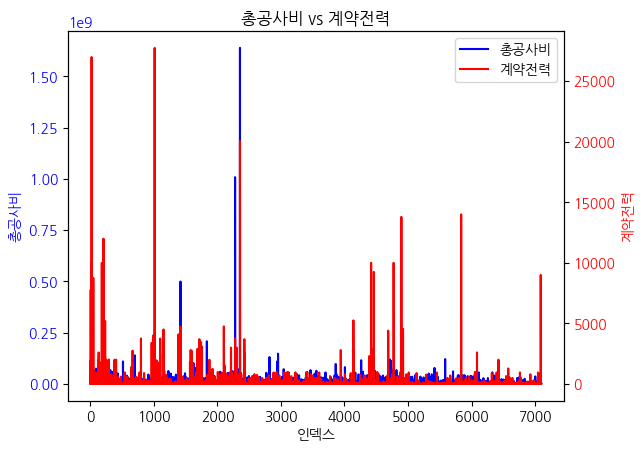

In [17]:
fig, ax1 = plt.subplots()

ax1.plot(df_cc.index, df_cc['총공사비'], color='b', label='총공사비')
ax1.set_xlabel('인덱스')
ax1.set_ylabel('총공사비', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_cc.index, df_cc['계약전력'], color='r', label='계약전력')
ax2.set_ylabel('계약전력', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, loc='upper right')

plt.title('총공사비 vs 계약전력')
plt.show()

In [18]:
df_cc_temp = df_cc[(df_cc['총공사비']<25000000) & (df_cc['계약전력']<100)]

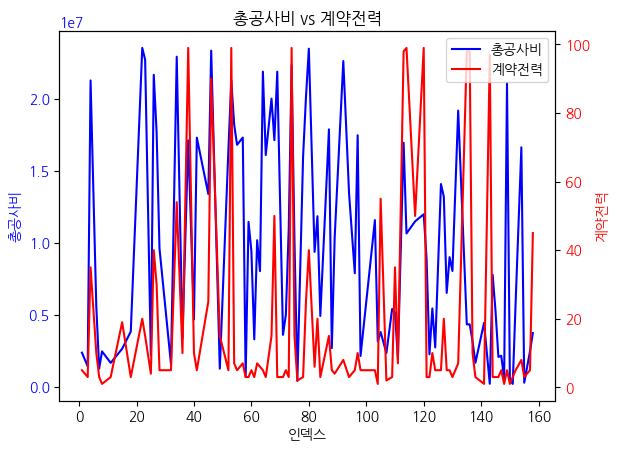

In [19]:
fig, ax1 = plt.subplots()

ax1.plot(df_cc_temp[:100].index, df_cc_temp['총공사비'][:100], color='b', label='총공사비')
ax1.set_xlabel('인덱스')
ax1.set_ylabel('총공사비', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_cc_temp[:100].index, df_cc_temp['계약전력'][:100], color='r', label='계약전력')
ax2.set_ylabel('계약전력', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, loc='upper right')

plt.title('총공사비 vs 계약전력')
plt.show()

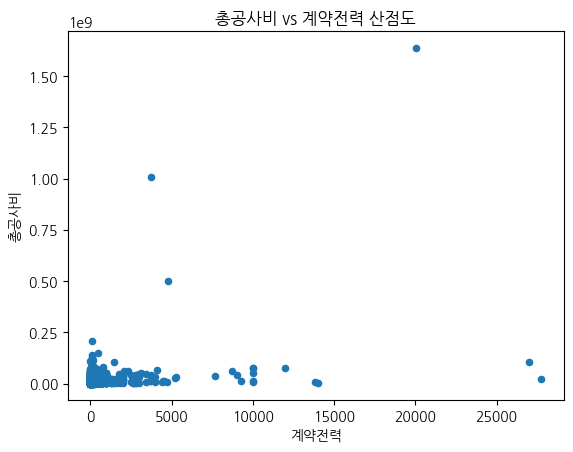

In [20]:
df_cc.plot.scatter(x='계약전력', y='총공사비')
plt.xlabel('계약전력')
plt.ylabel('총공사비')
plt.title('총공사비 vs 계약전력 산점도')
plt.show()

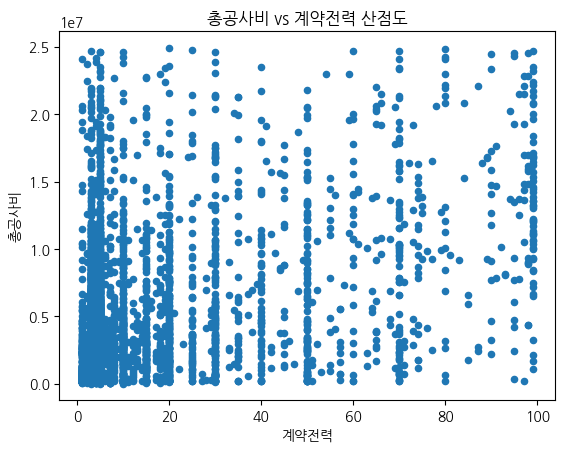

In [21]:
df_cc_temp.plot.scatter(x='계약전력', y='총공사비')
plt.xlabel('계약전력')
plt.ylabel('총공사비')
plt.title('총공사비 vs 계약전력 산점도')
plt.show()

# 계약전력과 총공사비는 관련성이 없다.

#### 신설만 추출

In [22]:
df_cc['접수종류명'].value_counts()

접수종류명
신설(상용/임시)     5810
신설(발전기)        597
증설             185
공급방식변경증설       155
계약종별변경증설       127
단순공급방식변경        74
해지후재사용(신규)      46
공급지점변경          43
일부해지(신규)        27
계약단위합병          23
신증설(예비전력)        6
증설(발전기)          2
계약변경(발전기)        1
계약단위분할           1
Name: count, dtype: int64

In [23]:
df_cc_new = df_cc[df_cc['접수종류명'] == '신설(상용/임시)']

#### 쓸만한 컬럼 추출

In [26]:
df_cc_pp = df_cc_new[['공사번호', '최초등록자사번', '최종변경자사번', '총공사비', '최초등록일시', '최종변경일시', '공사형태코드', '공사형태명', '계약전력']]

In [27]:
write_data('전처리 공사비', df_cc_pp)